In [1]:
import numpy as np
import matplotlib.pyplot as plt 

from sortedcontainers import SortedList
from future.utils import iteritems

In [8]:
class KNN:
  
  def __init__(self, k):
    self.k = k

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X):
    y = np.zeros(len(X))

    # для каждого X[i]
      # вычислить расстояния от X[i] до self.X[j]

    for i, x in enumerate(X):  
      sl = SortedList()
      for j, x_train in enumerate(self.X):
        diff = x - x_train  
        d = diff.dot(diff)  # Euclidian distance
        if (len(sl) < self.k):
          sl.add( (d, self.y[j]) )
        else:
          if (d < sl[-1][0] ):
            del sl[-1]
            sl.add( (d, self.y[j]) )
    #  k = 4
    #  if d = 0.2: pass
    #  [0.1, 0.3, 1, 1.5] ->
    #  [0.1, 0.3, 1, 1.3] ->
    #  ....
    #  [0.1, 0.2, 0.22, 0.23] [1, 0, 0, 0]

    # для _k_ ближайших к X[i] соседей:
      # найти наиболее часто встречающийся класс (c)
      # y[i] = c
      
      votes = {}
      for _, v in sl:
          votes[v] = votes.get(v, 0) + 1
      

      max_votes = 0
      max_votes_class = -1
      for v, count in iteritems(votes):
          if count > max_votes:
              max_votes = count
              max_votes_class = v
      y[i] = max_votes_class
    return y
        
  def score(self, X, y):
    P = self.predict(X)
    return np.mean(P == y)
      

    

X --> y 

(X_1 , y_1), (X_2, y_2) ... (X_n, y_n )

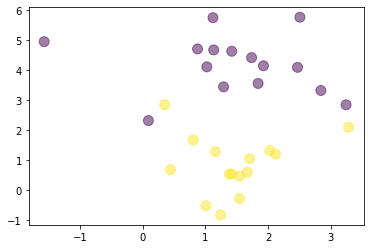

In [3]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

# X, y = make_moons(n_samples=100, random_state=42)
X, y = make_blobs(n_samples=30, centers=2, n_features=2,
                  random_state=0)
plt.scatter(X[:,0], X[:,1], s=100, c=y, alpha=0.5)
plt.show()




In [ ]:
X

In [9]:
model = KNN(k=1)

In [10]:
X_train, y_train = X[:20], y[:20]
X_test, y_test = X[20:], y[20:]
model.fit(X_train, y_train)

In [11]:
y_pred = model.predict(X_test)
y_pred == y_test

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True])

In [12]:
model.score(X_test, y_test)

0.9

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


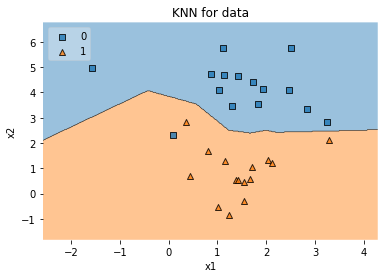

In [13]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('KNN for data')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


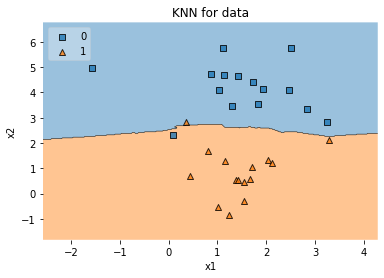

In [15]:
model = KNN(k=10)
model.fit(X, y)
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('KNN for data')
plt.show()